(100, 2) (100, 1)
[-3.  9.]
[-3.]
Poly names: ['x0' 'x0^2']


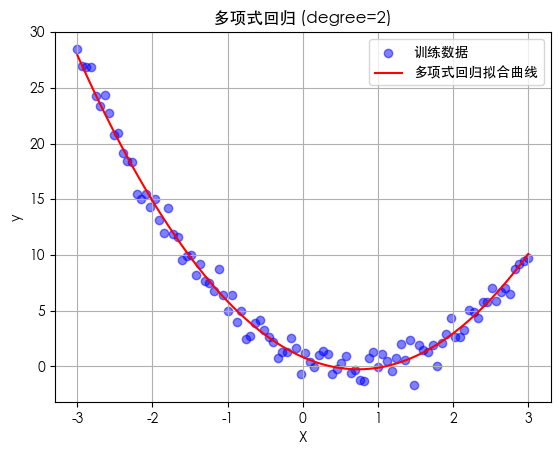

In [4]:
## 多项式回归--本质也是线性回归,只是需要数据预处理
### 多项式回归 -- 和之前np的多项式拟合基本差不多,本质就是封装
### 只能在给定的数据区间预测,当超过区间,就会出现不可预测的情况--只适合做训练输入集区间内的数据预测,超出x的范围将不准.
# 一元多项式回归
# y = w0 + w1*x + w2*2 + ... + wn*x
# 高次项可以看作对一次项特征的扩展,得到:
# y = w0 + w1*x1 + w2*x2 + ... + wn*xn

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['STHeiTi']
plt.rcParams['axes.unicode_minus'] = False

np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2*X**2 - 3*X + 1 + np.random.normal(0, 1, size=(100,1)) ## 多项式 + 噪声

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
print(X_poly.shape, X.shape)
print(X_poly[0])
print(X[0])
print('Poly names:', poly.get_feature_names_out())

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.figure()
plt.scatter(X, y, color='blue', label='训练数据', alpha=0.5)
plt.plot(X, y_pred, color='red', label='多项式回归拟合曲线')
plt.xlabel('X')
plt.ylabel('y')
plt.title('多项式回归 (degree=2)')
plt.legend()
plt.grid(True)
plt.show()


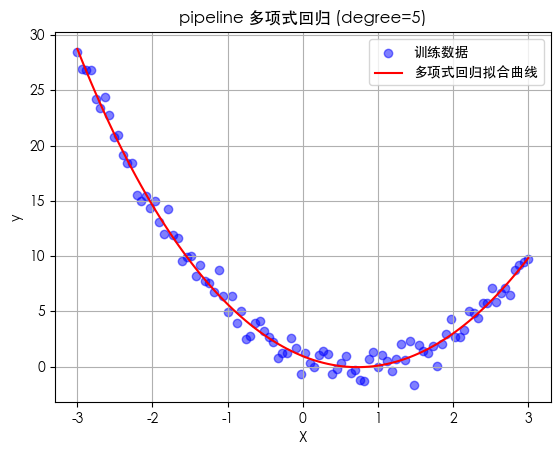

(0.7629129553676305, 0.9869624044148257)

In [4]:
## 管道流处理

import sklearn.pipeline as pipeline
import sklearn.preprocessing as sp
import sklearn.linear_model as lm
import sklearn.metrics as sm

model = pipeline.Pipeline([
    ('scaler', sp.StandardScaler()), ## 这里只对X标准化,y并没有标准化
    ('ploy', sp.PolynomialFeatures(degree=5, include_bias=False)),
    ('linear', lm.LinearRegression())
    ]
)

np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2*X**2 - 3*X + 1 + np.random.normal(0, 1, size=(100,1)) ## 多项式 + 噪声

model.fit(X, y)

y_pred = model.predict(X)

plt.figure()
plt.scatter(X, y, color='blue', label='训练数据', alpha=0.5)
plt.plot(X, y_pred, color='red', label='多项式回归拟合曲线')
plt.xlabel('X')
plt.ylabel('y')
plt.title('pipeline 多项式回归 (degree=5)')
plt.legend()
plt.grid(True)
plt.show()


sm.mean_squared_error(y, y_pred), sm.r2_score(y, y_pred)

In [ ]:
### 欠拟合 和 过拟合
# 欠拟合,模型过于简单,对于训练数据和测试数据,都无法给出足够高的预测精度
# 过拟合,模型过于复杂,对于训练数据能够给出较高的预测精度,但对于测试数据预测精度较低
# 一个性能可以接受的学习模型应该对训练数据和测试数据都有接近的预测精度,而且精度不能太低
#
# 训练数据R1, 预测数据R1
# 0.3         0.4         欠拟合,过于简单,无法反应数据规则
# 0.9         0.2         过拟合,过于复杂,太特殊,缺乏一般性,泛化性差
# 0.7         0.6         可接受,复杂度适中,既能反应数据规则,同时又不失一般性